# Text Classification (Group Assignment 1)

Take five different samples of Gutenberg digital books (or your choice of text corpus), which are of five different authors, that you suspect are of the same genres and are semantically the same. For example, choose two of the books 1- The Brothers Karamazov and 2- Thus Spoke Zarathustra.

Separate and set aside unbiased random partitions for training, validation and testing.

The overall objective is to produce classification predictions and compare them; analyze the pros and cons of algorithms and generate and communicate the insights.

 Gauge the bias and variability of the models to decide the champion model. Then play with the features and other factors that provide you with leverages to make it harder for the model to predict and bring the accuracy down for about 20% and then check the bias and variability.

Prepare the data: create random samples of 200 documents of each book, representative of the source input. Prepare the records of 100 words records for each document, label them as a, b and c etc. as per the book they belong to.

Preprocess the data: remove stop-words and garbage characters if needed.

Transform to BOW, and TF-IDF, n-gram, (LDA, word-embedding, optional) etc.

Train a machine that can tell which author (or genre), when asked!

Evaluation: Do ten-fold cross-validation.

Perform Error-Analysis: Identity what were the characteristics of the instance records that threw the machine off.

Document your steps, explain the results effectively, using graphs.

Verify and validate your programs; Make sure your programs run without syntax or logical errors.

Massage the data: Reduce the number of words per document if the accuracy is too high and then repeat the above steps.

----------------------------------------------------------

Rubric: (accounts for 20% of the final grade.)

**Choose data of your choice, (labelled data) 1%**

Preprocessing and Data Cleansing 1%

Feature Engineering 2%

Use SVM, Decision Tree, k-Nearest Neighbor, (BERT, Deep-learning optional) etc. 2%

Perform Evaluations, 2%

Compare and decide which algorithm is performing as the champion model 0.5%

Perform Error Analysis, 2%

Perform Visualizations, Graph the results 2%

One or Two pages of presentation 0.5%

The report, detail explanations 2%

Analysis of Bias and Variability 2%

Identifying, measuring and control the machine’s thresholds of factors of prediction hardship 2%

Group work: 1%

 

Quality Notes: Cohesion of your deliverables and the story counts most; the overall story should be organized and intertwined and be consistent with each insightful element. Have an insightful story to tell about the semantic nature of your chosen corpus.

Your principal task is to provide an insightful story!

Each group’s deliverables and insightful stories and technical measures should differ from one another among groups so that your presentation provides exceptional value to the class.

Group members should present interesting aspects of their classification exercise. Seriously avoid repetitive concepts that the class is already aware of.

# Importiung the required libraries 

In [ ]:
%pip install mlxtend --upgrade
import math
import nltk
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from mlxtend.evaluate import bias_variance_decomp
from sklearn import preprocessing


     |████████████████████████████████| 1.3 MB 5.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")
print(stopwords.words('english'))
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'a

True



---

---



---




# 1 - Prepare the Data and Text Preprocessing

1.  remove StopWords
2.   Lemmatization


---



---



---




In [ ]:
from urllib import request

url1 = "https://www.gutenberg.org/cache/epub/477/pg477.txt"          #  Criminal Sociology by Enrico Ferri
url2 = "https://www.gutenberg.org/cache/epub/12027/pg12027.txt"      #  crime:Its Cause and Treatment, by Clarence Darrow
url3 = "https://www.gutenberg.org/cache/epub/19564/pg19564.txt"      #  The Pirates' Who's Who, by Philip Gosse
url4 = "https://www.gutenberg.org/files/2760/2760-0.txt"             #  Celebrated Crimes, by Alexandre Dumas
url5 = "https://www.gutenberg.org/cache/epub/17188/pg17188.txt"      #  Buccaneers and Pirates of Our Coasts, by Frank Richard

urls = [url1 ,url2 ,url3, url4 ,url5]
Books_names = ["Criminal Sociology" ," crime:Its Cause and Treatment" , "The Pirates' Who's Who"  , "Celebrated Crimes " ,"Buccaneers and Pirates of Our Coasts"]
Books_label = [ 'a' ,'b' ,'c','d' ,'e']
Authors = ["EnricoFerri" ,"ClarenceDarrow" ,"PhilipGosse" , "AlexandreDumas" ,"FrankRichard"]
Books_contents = []

for U  in urls :
  response = request.urlopen(U)
  raw = response.read().decode('utf8' )
  text= re.findall(r"[a-zA-Z]{3,}", raw)
  lemmatizer = WordNetLemmatizer()
  lst =[]
  for i in text:
    W = i.lower()
    w = lemmatizer.lemmatize(W)
    if w not in set(stopwords.words('english')):
      lst.append(str(w))
  Books_contents.append(lst)

    # make sure that all lists contain 100 word 
Books_contents_100 = []               
for i in Books_contents:
  l = i[0:(math.floor(len(i)/100)) * 100]
  Books_contents_100.append(l)



# combine all lists in one dataframe 
data = pd.DataFrame()

for i in range(len(Books_contents_100)):
    dic = {}

    lis =  [Books_contents_100[i][x:x+100] for x in range(0, len(Books_contents_100[i]), 100)]

    dic['index']= i  # refer to the number of the book 
    dic['Authors']= Authors[i]
    dic['title']= Books_names[i] # refer to the book name
    dic['label'] = Books_label[i]
    dic['100_Words'] = lis # the partition of 100 words
    df_0 = pd.DataFrame(dic)
    for i in range(len(df_0)):
      df_0["100_Words"][i] = " ".join(df_0["100_Words"][i])
    df = df_0[:200]
    data = data.append(df)

data = shuffle(data)

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,Authors,title,label,100_Words
40,2,PhilipGosse,The Pirates' Who's Who,c,woolwich common perpetuate memory husband rid ...
111,0,EnricoFerri,Criminal Sociology,a,distinguish actual apparent one hand decrease ...
192,1,ClarenceDarrow,crime:Its Cause and Treatment,b,instead urging public execution advanced sensi...
102,0,EnricoFerri,Criminal Sociology,a,shall presently see gravest crime especially p...
187,0,EnricoFerri,Criminal Sociology,a,birth every commune special column civil stand...



 The most frequent 50 words of book c



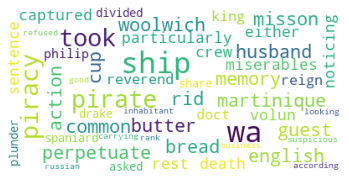


 The most frequent 50 words of book a



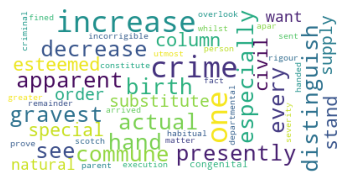


 The most frequent 50 words of book b



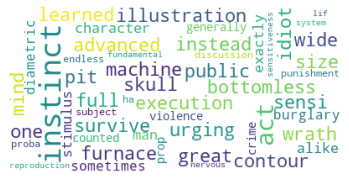


 The most frequent 50 words of book e



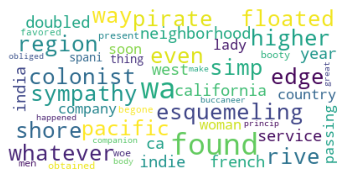


 The most frequent 50 words of book d



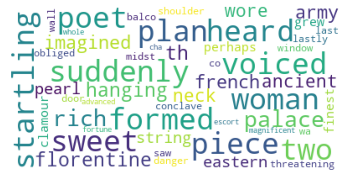

In [ ]:
# plot word cloud for the most frequent 50 words in each book  
import wordcloud

for label in data['label'].unique():
  books = data[data["label"]==label]["100_Words"]

  #wordcloud 
  print(f"\n The most frequent 50 words of book {label}\n")
  wc = wordcloud.WordCloud(background_color='white', max_words=50, 
                          max_font_size=35)
  wc = wc.generate(str(books))
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

In [ ]:
X_data = data['100_Words']
Y_data = data['label']

print(X_data.shape)
print(Y_data.shape)

# Split data to train and test
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_data, Y_data, test_size= 0.3, random_state= 42)

(1000,)
(1000,)


In [ ]:
# ensure that the data consists of 5 different books with 200 document for each 
lengths = [len(data[data['label'] == x ]) for x in Books_label ]
lengths

[200, 200, 200, 200, 200]




---



---



---


#  **Feature Engineering **


* `  Bag of Words`

1.   SVM Model
2.  Decision Tree
1.   KNN



*  ` TF_IDF`

1.   SVM Model
2.  Decision Tree
1.   KNN


* `  Bag of Words`

1.   SVM Model
2.  Decision Tree
1.   KNN


*   `Word Embedding`





1.   Embedding layer







---



---



---



## functions for building and training the model

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0,5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Cross-validation score")

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
    return plt


In [ ]:
def build_model(model, model_name, X_train, X_test, y_train, y_test, cv ):

  global general_model
  general_model = model.fit(X_train, y_train) # train the model
  # make prediction of X_test and print Classification report
  global y_pred
  y_pred = model.predict(X_test)
  # 2- Applying K_Fold Cross Vaildation

  cv_accuracies = cross_val_score(estimator = model , X= X_train , y = y_train ,cv = cv)
  accuracy_avg = cv_accuracies.mean()# measure the accuracy of the model (bais)
  test_accuracy = accuracy_score(y_test, y_pred)
  # Evaluate the model performance using metrics.accuracy_score to measure the score
  print("cross_validation accuracy :  ", cv_accuracies)
  print("\n average cross validation accuracy :  " , accuracy_avg)
  print("\n testing accuracy :  "  ,test_accuracy,"\n")
  print("----------------------------------------------------------------------------------------------")

 

  print(classification_report(y_test, y_pred))

  # print Confusion Matrix
  print('\nConfusion Matrix:\n')
  print(confusion_matrix(y_test, y_pred))
  print("----------------------------------------------------------------------------------------------")
  plot_confusion_matrix(general_model, X_test, y_test, xticks_rotation='vertical')
 
  plot_learning_curve(general_model,"Learning Curve of "+ model_name,X_train, y_train, ylim=(0, 1.1), cv=cv, n_jobs=8)

  print("----------------------------------------------------------------------------------------------")
  

In [ ]:
def which_one_misclassify(X_train, y_train, X_test, y_test ,y_pred):
  errors  = [] 
  correct = []
  predict = []
  gg=np.array(y_test)

  for index ,text in enumerate(X_test_df) :
    if y_pred[index] != gg[index]:
      error = text
      errors.append(error)
      corr = gg[index]
      correct.append(corr)
      pred = y_pred[index]
      predict.append(pred)
  document_df = pd.DataFrame()
  document_df['doc_error'] = errors
  document_df['correct']   = correct
  document_df['Predicted'] = predict
  #document_df['book_name'] = 
  print(" The Documents that the Model Misclassify are  : " , len(errors))
  print("----------------------------------------------------------------------------------------------\n")

  #label_encoder object knows how to understand word labels. 
  label_encoder = preprocessing.LabelEncoder()
  X_train_copy = np.copy(X_train)
  X_test_copy = np.copy(X_test)
  y_train_copy = np.copy(y_train)
  y_test_copy = np.copy(y_test)

  avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
         general_model, np.array(X_train_copy)  , label_encoder.fit_transform(y_train_copy)  , np.array(X_test_copy)  , label_encoder.fit_transform(y_test_copy),num_rounds=2, random_seed=123)
  
  print('Average bias: %.3f' % avg_bias)
  print('Average variance: %.3f' % avg_var)
  print("----------------------------------------------------------------------------------------------")

  return document_df 



##                         Bag Of Words






In [ ]:
count_Vec= CountVectorizer()
bow = count_Vec.fit_transform(data['100_Words'])
bow_df = pd.DataFrame(bow.toarray(), columns=count_Vec.get_feature_names())
bow_df

,abandon,abandoned,abandoning,abandonment,abashed,abate,abatement,abbacy,abbess,abbey,abbreviation,abc,abduction,aberdare,aberdeen,aberration,abeyance,abhorrence,abhors,abiding,ability,ablaze,able,ably,abnormal,abnormality,abnormally,aboard,abode,abolish,abolished,abolishing,abolition,abominable,abominably,aboriginal,abortion,abound,abounds,abreast,...,yard,yarmouth,yarn,yea,yeally,year,yearly,yell,yellow,yes,yesterday,yet,yield,yielded,yielding,yingling,yon,york,young,younger,youngest,youngoul,youngster,youth,youthful,yucatan,yvern,yves,zante,zanzibar,zara,zeal,zealand,zealot,zip,zizimeh,zone,zoo,zoology,zschokke
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Split Dataset to train and test



In [ ]:
X = bow.toarray()
Y = data['label']

print(X.shape)
print(Y.shape)

# Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

(1000, 11712)
(1000,)


 #  1- Decision Tree based on BOW

cross_validation accuracy :   [0.72857143 0.85714286 0.74285714 0.84285714 0.78571429 0.82857143
 0.8        0.74285714 0.78571429 0.75714286]

 average cross validation accuracy :   0.7871428571428571

 testing accuracy :   0.7566666666666667 

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.76      0.75      0.76        56
           b       0.68      0.84      0.75        49
           c       0.68      0.67      0.67        60
           d       0.86      0.82      0.84        66
           e       0.79      0.72      0.76        69

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300


Confusion Matrix:

[[42 11  1  2  0]
 [ 7 41  0  1  0]
 [ 2  2 40  4 12]
 [ 3  6  2 54  1]
 [ 1  0 16  2 50]]
-----------------------------------------------------------

,doc_error,correct,Predicted
0,expedition find whether spanish vessel bay wel...,e,c
1,thrown world imperfect shape environment ha ev...,b,d
2,spoil porto bello came counted wa found great ...,e,c
3,lack education serious mischievous still doe p...,a,b
4,francis drake made division spoil distributing...,c,b


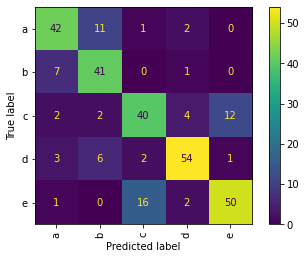

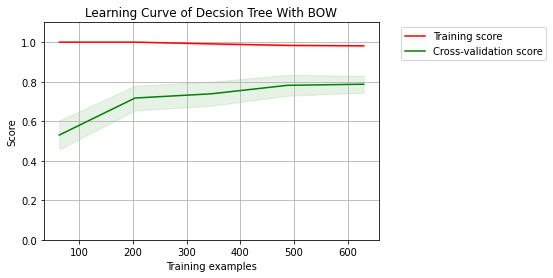

In [ ]:
decision_tree_BOW = DecisionTreeClassifier(random_state=0, max_depth= 10, criterion= 'entropy', min_samples_leaf= 1)

build_model(decision_tree_BOW,"Decsion Tree With BOW", X_train, X_test, y_train, y_test ,10)

DT_Bow_error_df = which_one_misclassify(X_train, y_train, X_test, y_test ,y_pred)
display(DT_Bow_error_df.head())

# 2 - KNN Based on BOW

cross_validation accuracy :   [0.91428571 0.97142857 0.94285714 0.97142857 0.98571429 0.94285714
 0.98571429 0.92857143 0.97142857 0.97142857]

 average cross validation accuracy :   0.9585714285714285

 testing accuracy :   0.9533333333333334 

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.93      1.00      0.97        57
           b       0.98      0.97      0.98        64
           c       1.00      0.85      0.92        53
           d       1.00      0.96      0.98        72
           e       0.85      0.98      0.91        54

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300


Confusion Matrix:

[[57  0  0  0  0]
 [ 2 62  0  0  0]
 [ 0  0 45  0  8]
 [ 1  1  0 69  1]
 [ 1  0  0  0 53]]
-----------------------------------------------------------

,doc_error,correct,Predicted
0,early settler new york massachusetts carolina ...,c,e
1,coarse linen cloth steeped blood animal slaugh...,c,e
2,teach avery buccaneer headed great sir henry m...,c,e
3,illustrated illustration pirate climbed side m...,e,a
4,jealous insincere according tammasi wa great a...,d,e
5,christian mother born island lesbon gean sea s...,c,e
6,natural history example described quaint style...,c,e
7,piracy reign king philip spaniard asked drake ...,c,e
8,assumed grave composed expression face spoke f...,d,a
9,follow clarence darrow chicago august content ...,b,a


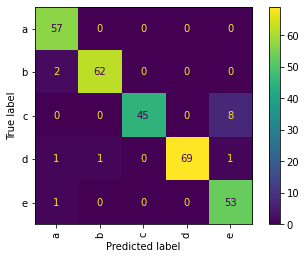

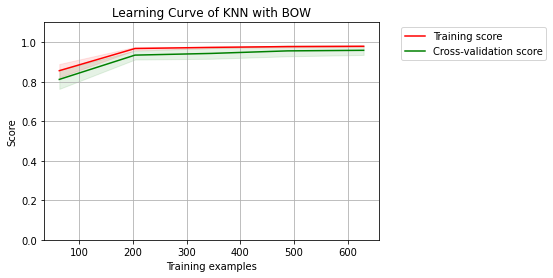

In [ ]:
knn_bow = KNeighborsClassifier(n_neighbors = 3, algorithm= 'kd_tree', p= 1)
build_model(knn_bow,"KNN with BOW", X_train, X_test, y_train, y_test ,10)

KNN_Bow_error_df = which_one_misclassify(X_train, y_train, X_test, y_test ,y_pred)
display(KNN_Bow_error_df.head())


# 3 - SVM Based on BOW

cross_validation accuracy :   [0.98571429 0.95714286 0.97142857 0.98571429 1.         0.95714286
 0.95714286 0.97142857 1.         1.        ]

 average cross validation accuracy :   0.9785714285714286

 testing accuracy :   0.9633333333333334 

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.99      0.99      0.99        69
           b       0.92      0.98      0.95        57
           c       0.98      0.91      0.95        57
           d       0.97      0.98      0.97        57
           e       0.97      0.95      0.96        60

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


Confusion Matrix:

[[68  0  0  1  0]
 [ 0 56  0  1  0]
 [ 0  3 52  0  2]
 [ 1  0  0 56  0]
 [ 0  2  1  0 57]]
-----------------------------------------------------------

,doc_error,correct,Predicted
0,piracy reign king philip spaniard asked drake ...,c,e
1,man shall sign article without consent company...,c,b
2,way deal child fancy believe every man woman s...,c,b
3,ranging special arrangement several publisher ...,e,b
4,wa worst mistake spaniard could made wild men ...,c,e
5,illustrated illustration pirate climbed side m...,e,b
6,flibustier may remarked name buccaneer wa chie...,e,c
7,project gutenberg ebook celebrated crime alexa...,d,a
8,horse dog cat even white mouse blood sufficien...,c,b
9,consequence glance surface normal conscience m...,a,d


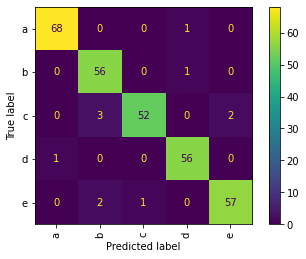

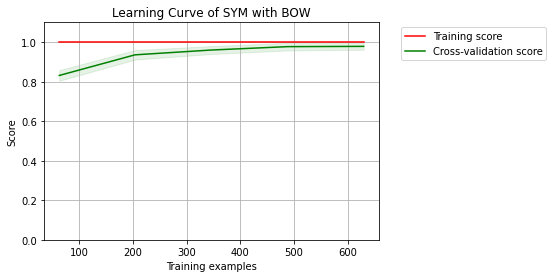

In [ ]:
svm_bow = svm.SVC(kernel='linear')
build_model(svm_bow,"SYM with BOW", X_train, X_test, y_train, y_test ,10)
SVM_Bow_error_df = which_one_misclassify(X_train, y_train, X_test, y_test ,y_pred)
display(SVM_Bow_error_df.head())




---



---

#   TF_IDF 

class sklearn.feature_extraction.text.TfidfVectorizer(*, input='content',   
lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)[source]

In [ ]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['100_Words'])
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
tfidf_df

,abandon,abandoned,abandoning,abandonment,abashed,abate,abatement,abbacy,abbess,abbey,abbreviation,abc,abduction,aberdare,aberdeen,aberration,abeyance,abhorrence,abhors,abiding,ability,ablaze,able,ably,abnormal,abnormality,abnormally,aboard,abode,abolish,abolished,abolishing,abolition,abominable,abominably,aboriginal,abortion,abound,abounds,abreast,...,yard,yarmouth,yarn,yea,yeally,year,yearly,yell,yellow,yes,yesterday,yet,yield,yielded,yielding,yingling,yon,york,young,younger,youngest,youngoul,youngster,youth,youthful,yucatan,yvern,yves,zante,zanzibar,zara,zeal,zealand,zealot,zip,zizimeh,zone,zoo,zoology,zschokke
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.052181,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.135205,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.052338,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.071206,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110111,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.131441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.110883,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.112809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.

# Split Dataset to train and test


In [ ]:
XX= tfidf.toarray()
yy = data['label']

print(XX.shape)
print(yy.shape)

# Split data to train and test
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size= 0.3, random_state= 42)




(1000, 11712)
(1000,)


 ## 1- Decision Tree _based on TFIDF

cross_validation accuracy :   [0.8        0.75714286 0.81428571 0.78571429 0.8        0.84285714
 0.78571429 0.78571429 0.81428571 0.68571429]

 average cross validation accuracy :   0.7871428571428571

 testing accuracy :   0.76 

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.79      0.81      0.80        52
           b       0.75      0.67      0.71        58
           c       0.70      0.81      0.75        62
           d       0.75      0.90      0.82        60
           e       0.83      0.63      0.72        68

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300


Confusion Matrix:

[[42  8  0  2  0]
 [10 39  0  9  0]
 [ 0  1 50  3  8]
 [ 1  4  0 54  1]
 [ 0  0 21  4 43]]
-------------------------------------------------------------------------

,doc_error,correct,Predicted
0,francis drake made division spoil distributing...,c,b
1,italy france assize court homicide murder robb...,a,d
2,life lock key like wild animal eager escape ce...,b,a
3,sign marvellous quickness mind grew older exhi...,d,b
4,thus vowing inward vow reached goal would foll...,d,b
...,...,...,...
67,hand table desk stationery bookkeeper clerk er...,e,d
68,force offer wa accepted gladly basco great rep...,e,c
69,wa called roc name wa unknown brazilian wa bor...,e,c
70,hell following interesting portion document lo...,b,d


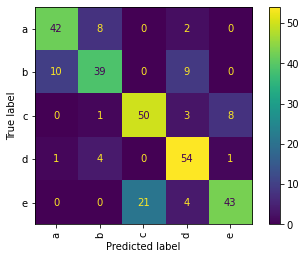

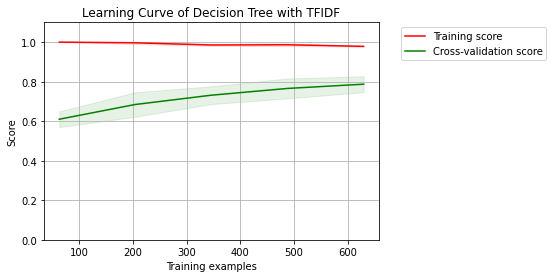

In [ ]:
# Build DT model
Decision_tree_tfidf = DecisionTreeClassifier(random_state=0, max_depth= 10)
build_model(Decision_tree_tfidf, "Decision Tree with TFIDF", XX_train, XX_test, yy_train, yy_test ,10)
which_one_misclassify(yy_test ,y_pred)

DT_tfidf_error_df = which_one_misclassify(XX_train, yy_train, XX_test, yy_test ,y_pred)
display(DT_tfidf_error_df.head())


# 2- KNN_based on TFIDF

cross_validation accuracy :   [0.95714286 0.98571429 0.95714286 0.94285714 0.97142857 0.95714286
 0.91428571 0.95714286 0.92857143 0.97142857]

 average cross validation accuracy :   0.9542857142857143

 testing accuracy :   0.93 

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.89      0.98      0.93        57
           b       0.97      0.88      0.92        64
           c       1.00      0.87      0.93        53
           d       1.00      0.94      0.97        72
           e       0.82      0.98      0.89        54

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300


Confusion Matrix:

[[56  1  0  0  0]
 [ 7 56  0  0  1]
 [ 0  0 46  0  7]
 [ 0  0  0 68  4]
 [ 0  1  0  0 53]]
-------------------------------------------------------------------------

,doc_error,correct,Predicted
0,early settler new york massachusetts carolina ...,c,e
1,coarse linen cloth steeped blood animal slaugh...,c,e
2,teach avery buccaneer headed great sir henry m...,c,e
3,succession powder law facilitate securing pate...,a,b
4,xiii chapter xiv chapter chapter xvi epilogue ...,d,e
5,bear upon subject young man little wit concern...,d,e
6,illustrated illustration pirate climbed side m...,e,b
7,influence finding science accessible checked o...,b,a
8,one hold spider loathsome insect fire abhors d...,b,e
9,enemy man fear one cause misery pain many fact...,b,a


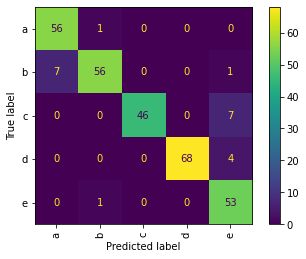

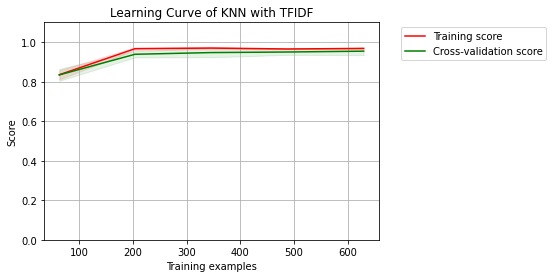

In [ ]:
knn_tfidf =  KNeighborsClassifier(n_neighbors = 5, algorithm= 'kd_tree', p=2)

build_model(knn_tfidf, "KNN with TFIDF", XX_train, XX_test, yy_train, yy_test ,10)
knn_tfidf_error_df = which_one_misclassify(XX_train, yy_train, XX_test, yy_test ,y_pred)
display(knn_tfidf_error_df.head())


## 3- SVM based on TF_IDF ( The Champion Model )


cross_validation accuracy :   [0.98571429 0.94285714 0.97142857 1.         0.97142857 1.
 0.97142857 1.         0.97142857 0.98571429]

 average cross validation accuracy :   0.9800000000000001

 testing accuracy :   0.9866666666666667 

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       1.00      1.00      1.00        55
           b       0.98      1.00      0.99        59
           c       1.00      0.95      0.98        64
           d       1.00      1.00      1.00        61
           e       0.95      0.98      0.97        61

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Confusion Matrix:

[[55  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 61  0  3]
 [ 0  0  0 61  0]
 [ 0  1  0  0 60]]
-------------------------------------------------------------------

,doc_error,correct,Predicted
0,would row alongside suddenly shout curse board...,c,e
1,coarse linen cloth steeped blood animal slaugh...,c,e
2,brilliant public speaker able eloquence sway v...,c,e
3,ranging special arrangement several publisher ...,e,b


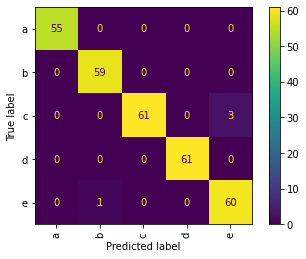

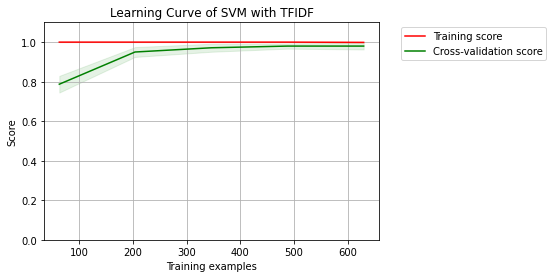

In [ ]:
# Build SVM model
svm_tfidf = svm.SVC(kernel='sigmoid')

build_model(svm_tfidf, "SVM with TFIDF", XX_train, XX_test, yy_train, yy_test ,10)
SVM_tfidf_error_df  = which_one_misclassify(XX_train, yy_train, XX_test, yy_test ,y_pred)
display(SVM_tfidf_error_df.head())

# Champion Model

  - SVM based on TF-IDF is the best model with the highest accuracy and lowest bias and variance
  - Change the kernel type and degree make the accuracy go down  



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231:

cross_validation accuracy :   [0.8        0.67142857 0.72857143 0.74285714 0.67142857 0.67142857
 0.74285714 0.72857143 0.85714286 0.7       ]

 average cross validation accuracy :   0.7314285714285714

 testing accuracy :   0.7666666666666667 

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.91      0.87      0.89        55
           b       0.72      0.85      0.78        59
           c       0.61      0.88      0.72        64
           d       0.92      0.77      0.84        61
           e       0.83      0.48      0.60        61

    accuracy                           0.77       300
   macro avg       0.80      0.77      0.77       300
weighted avg       0.79      0.77      0.76       300


Confusion Matrix:

[[48  7  0  0  0]
 [ 5 50  3  1  0]
 [ 0  1 56  1  6]
 [ 0  7  7 47  0]
 [ 0  4 26  2 29]]
-----------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Average bias: 0.390
Average variance: 0.237
----------------------------------------------------------------------------------------------


,doc_error,correct,Predicted
0,classic lighter sort latin verse might mistake...,d,b
1,father wa handsome true whereas lorenzo contra...,d,c
2,criticism theory penal substitute difficult ap...,a,b
3,sailed tortuga proceeded without loss time get...,e,c
4,taken pen gave pleasing color proceeding reall...,e,c


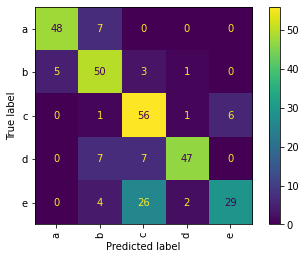

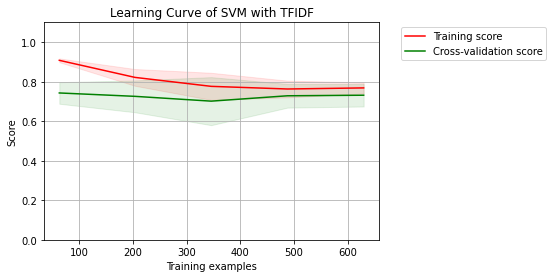

In [ ]:
# Build SVM model
svm_tfidf_lower_20 = svm.SVC(kernel = 'poly', max_iter= 3)

build_model(svm_tfidf_lower_20, "SVM with TFIDF", XX_train, XX_test, yy_train, yy_test ,10)
svm_tfidf_lower_20_error_df  = which_one_misclassify(XX_train, yy_train, XX_test, yy_test ,y_pred)
display(svm_tfidf_lower_20_error_df.head())

# Error Analysis of Chmpion model (SVM based TF_IDF ) 

In [ ]:
SVM_tfidf_error_df

,doc_error,correct,Predicted
0,illustrated illustration pirate climbed side m...,e,c
1,way deal child fancy believe every man woman s...,c,b
2,coarse linen cloth steeped blood animal slaugh...,c,e
3,hell following interesting portion document lo...,b,d


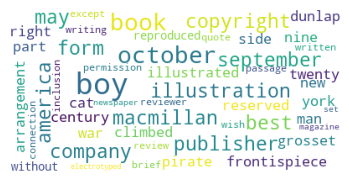

'illustrated illustration pirate climbed side man war twenty nine cat frontispiece illustration grosset dunlap publisher new york arrangement macmillan company copyright century copyright macmillan company right reserved part book may reproduced form without permission writing publisher except reviewer wish quote brief passage connection review written inclusion magazine newspaper set electrotyped july reprinted november september may april october october march september january october printed united state america foreword tempting boy giving wholesome form want purpose power scouting help parent leader youth secure book boy like best also best boy boy scout america organized every boy library book included formerly sold price'

In [ ]:
wc = wordcloud.WordCloud(background_color='white', max_words=50, 
                          max_font_size=35)
wc = wc.generate(SVM_tfidf_error_df['doc_error'][0])
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()
SVM_tfidf_error_df['doc_error'][0]

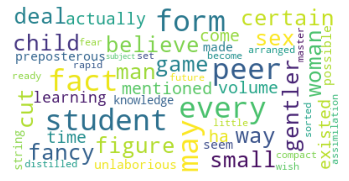

'way deal child fancy believe every man woman since certain gentler sex cut small figure game mentioned volume actually existed time ha come every form learning however preposterous may seem made unlaborious possible would student knowledge string fact arranged sorted distilled set compact form ready rapid assimilation little fear student may wish future become master subject delve original source search fact date surely pirate taking broadest sense much entitled biographical dictionary clergyman race horse artist ferro concrete assured medical men directory lawyer list peer peerage book record name particular musician schoolmaster stockbroker saint bookmaker dare say average adjuster almanac peer'

In [ ]:
  wc = wordcloud.WordCloud(background_color='white', max_words=50, 
                          max_font_size=35)
wc = wc.generate(SVM_tfidf_error_df['doc_error'][1])
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()
SVM_tfidf_error_df['doc_error'][1]

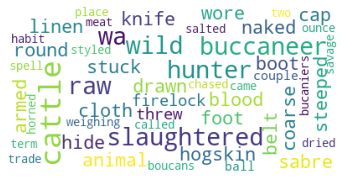

'coarse linen cloth steeped blood animal slaughtered wore round cap boot hogskin drawn naked foot belt raw hide stuck sabre knife also armed firelock threw couple ball weighing two ounce place dried salted meat called boucans term came styled bucaniers buccaneer spell hunter trade savage habit chased slaughtered horned cattle trafficked flesh favourite food wa raw marrow bone beast shot ate slept ground table wa stone bolster trunk tree roof hot sparkling heaven antilles spaniard jealous nation foothold america determined get rid wild hitherto harmless buccaneer accomplished time drove cattle hunter hispaniola make sure unwelcome visitor return exterminated wild cattle'

In [ ]:
wc = wordcloud.WordCloud(background_color='white', max_words=50, 
                          max_font_size=35)
wc = wc.generate(SVM_tfidf_error_df['doc_error'][2])
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()
SVM_tfidf_error_df['doc_error'][2]

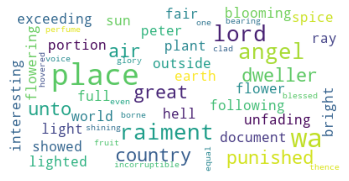

'hell following interesting portion document lord showed peter great country outside world exceeding bright light air lighted ray sun earth blooming unfading flower full spice plant fair flowering incorruptible bearing blessed fruit great wa perfume wa borne thence even unto dweller place clad raiment shining angel raiment wa like unto country angel hovered glory dweller wa equal one voice sang praise alternately lord god rejoicing place lord said place brother righteous place saw another exceedingly parched wa place punishment punished angel punished wore dark raiment like air place certain person hanging tongue blaspheme way righteousness lay fire whose flame tortured'

In [ ]:
wc = wordcloud.WordCloud(background_color='white', max_words=50, 
                          max_font_size=35)
wc = wc.generate(SVM_tfidf_error_df['doc_error'][3])
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()
SVM_tfidf_error_df['doc_error'][3]


 The most frequent 50 words of book b



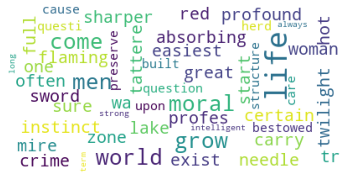


 The most frequent 50 words of book c



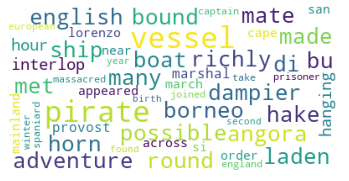


 The most frequent 50 words of book e



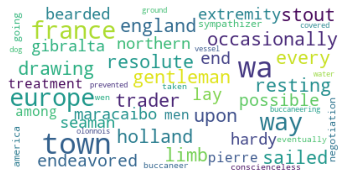

In [ ]:
# plot word cloud for the most frequent 50 words in each book  
import wordcloud

for label in ["b","c", 'e']:
  books = data[data["label"]==label]["100_Words"]

  #wordcloud 
  print(f"\n The most frequent 50 words of book {label}\n")
  wc = wordcloud.WordCloud(background_color='white', max_words=50, 
                          max_font_size=35)
  wc = wc.generate(str(books))
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

# N-Gram

In [ ]:

# build bigram model
# 2-grams of words in addition to the 1-grams (individual words)
bigram_vectorizer = CountVectorizer(ngram_range=(1,2))

bigram = bigram_vectorizer.fit_transform(data['100_Words'])

bigram_df = pd.DataFrame(bigram.toarray(), columns= bigram_vectorizer.get_feature_names())

bigram_df

,abandon,abandon ally,abandon buccaneering,abandon leave,abandon piracy,abandoned,abandoned child,abandoned fact,abandoned fight,abandoned fury,abandoned infant,abandoned malignant,abandoned quite,abandoned seduction,abandoned town,abandoned vulgar,abandoned woman,abandoning,abandoning enterprise,abandoning naples,abandoning old,abandonment,abandonment first,abandonment frequently,abandonment infant,abandonment lack,abandonment like,abashed,abashed augur,abate,abate pretension,abatement,abatement enthusiasm,abatement soon,abbacy,abbacy subiaco,abbess,abbess entered,abbey,abbey subiaca,...,yucatan although,yvern,yvern cidive,yvern prison,yves,yves alegre,zante,zante corfu,zanzibar,zanzibar plundered,zara,zara spalatra,zeal,zeal course,zeal enforcement,zeal new,zeal professor,zeal public,zeal shown,zeal soldier,zealand,zealand early,zealot,zealot met,zip,zip buccaneer,zip file,zip http,zip trying,zizimeh,zizimeh argued,zone,zone frequent,zone sure,zoo,zoo many,zoology,zoology natural,zschokke,zschokke german
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Split Dataset to train and test

In [ ]:
XXX = bigram.toarray()
yyy = data['label']

print(XXX.shape)
print(yyy.shape)

# Split data to train and test
XXX_train, XXX_test, yyy_train, yyy_test = train_test_split(XXX, yyy, test_size= 0.3, random_state= 42)


(1000, 94752)
(1000,)


# 1- Decision Tree _based on N-Gram

cross_validation accuracy :   [0.8        0.74285714 0.77142857 0.85714286 0.78571429 0.78571429
 0.8        0.75714286 0.68571429 0.77142857]

 average cross validation accuracy :   0.7757142857142858

 testing accuracy :   0.7933333333333333 

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.71      0.74      0.73        47
           b       0.77      0.80      0.78        64
           c       0.77      0.81      0.79        62
           d       0.84      0.89      0.86        61
           e       0.86      0.73      0.79        66

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300


Confusion Matrix:

[[35 12  0  0  0]
 [10 51  0  3  0]
 [ 1  0 50  4  7]
 [ 3  2  1 54  1]
 [ 0  1 14  3 48]]
-----------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


----------------------------------------------------------------------------------------------
 The Documents that the Model Misclassify are  :  62
----------------------------------------------------------------------------------------------

Average bias: 0.270
Average variance: 0.115
----------------------------------------------------------------------------------------------


,doc_error,correct,Predicted
0,buccaneer knight sacking several town deciding...,c,d
1,project gutenberg ebook celebrated crime alexa...,d,a
2,crime succeeded various adherent positive scho...,a,b
3,controlling emotion today crime strictly speak...,b,a
4,mean vindictive persecution produced opposite ...,a,b
...,...,...,...
57,force suddenness punishment doe stand test eve...,a,b
58,met resistance spaniard failed blow dreaded en...,e,c
59,collectively constantly teeter brink precipice...,b,a
60,process human action governed largely instinct...,b,a


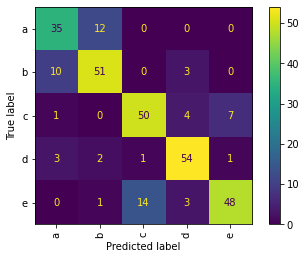

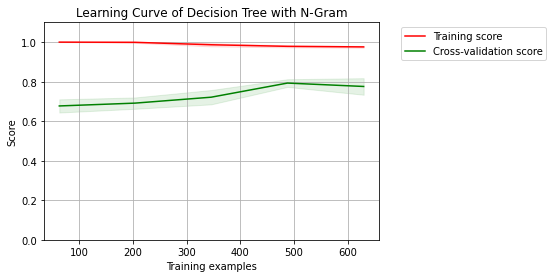

In [ ]:
# Build DT model
Decision_tree_n_gram = DecisionTreeClassifier(random_state=0, max_depth= 10) 
build_model(Decision_tree_n_gram, "Decision Tree with N-Gram", XXX_train, XXX_test, yyy_train, yyy_test ,10)

dt_ngram_error_df = which_one_misclassify(XXX_train, yyy_train, XXX_test, yyy_test ,y_pred)
display(dt_ngram_error_df.head())

# 2- KNN_based on N-Gram

In [ ]:
knn_n_gram =  KNeighborsClassifier(n_neighbors = 5, algorithm= 'kd_tree', p=2)

build_model(knn_n_gram, "KNN with N-Gram", XXX_train, XXX_test, yyy_train, yyy_test ,10)

knn_ngram_error_df = which_one_misclassify(XXX_train, yyy_train, XXX_test, yyy_test ,y_pred)
display(knn_ngram_error_df.head())


cross_validation accuracy :   [0.92857143 0.92857143 0.88571429 0.91428571 0.91428571 0.88571429
 0.95714286 0.84285714 0.95714286 0.88571429]

 average cross validation accuracy :   0.9099999999999999

 testing accuracy :   0.92 

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.82      1.00      0.90        47
           b       1.00      0.83      0.91        64
           c       0.93      0.90      0.92        62
           d       0.91      0.97      0.94        61
           e       0.94      0.92      0.93        66

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300


Confusion Matrix:

[[47  0  0  0  0]
 [ 8 53  0  3  0]
 [ 1  0 56  2  3]
 [ 0  0  1 59  1]
 [ 1  0  3  1 61]]
-------------------------------------------------------------------------

#3- SVM based on N-Gram

In [ ]:
 # Build SVM model
svm_n_gram = svm.SVC(kernel='sigmoid')

build_model(svm_n_gram, "SVM with N-gram", XXX_train, XXX_test, yyy_train, yyy_test ,10)

svm_ngram_error_df = which_one_misclassify(XXX_train, yyy_train, XXX_test, yyy_test ,y_pred)
display(svm_ngram_error_df.head())

cross_validation accuracy :   [0.95714286 0.94285714 0.98571429 0.98571429 0.98571429 0.95714286
 0.95714286 0.97142857 0.98571429 0.98571429]

 average cross validation accuracy :   0.9714285714285715

 testing accuracy :   0.9566666666666667 

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.98      0.98      0.98        56
           b       0.93      0.97      0.95        68
           c       1.00      0.90      0.95        61
           d       0.97      0.97      0.97        60
           e       0.91      0.96      0.94        55

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


Confusion Matrix:

[[55  0  0  1  0]
 [ 1 66  0  1  0]
 [ 0  1 55  0  5]
 [ 0  2  0 58  0]
 [ 0  2  0  0 53]]
-----------------------------------------------------------

# Neural netwok using embedding layer 

In [ ]:
vocab_size = 1000
embedding_dim =16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<oov>"
training_portion = .7
train_size =int(len(data) * training_portion)


X_train, X_test, y_train, y_test = train_test_split(data['100_Words'], data['label'], test_size=0.1, random_state=42)


training_author =  y_train[100:]
training_words  =  X_train[100:]

validate_author = y_train[:100]
validate_words  = X_train[:100]

# tokenize the traing words and make a sequences 
tokenizer = Tokenizer(num_words= vocab_size ,oov_token = oov_tok,lower = True)
tokenizer.fit_on_texts(data['100_Words'])
word_index = tokenizer.word_index
train_sequences = np.array(tokenizer.texts_to_sequences(training_words))
validate_sequences  = np.array(tokenizer.texts_to_sequences(validate_words))

label_tokenizer =Tokenizer() 
label_tokenizer.fit_on_texts(data['label']) 
training_label_seq = np.array(label_tokenizer.texts_to_sequences(training_author))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validate_author))



In [ ]:
print(train_sequences.shape)
print(training_label_seq.shape)
print(validate_sequences.shape)
print(validation_label_seq.shape)

(800, 100)
(800, 1)
(100, 100)
(100, 1)


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size ,embedding_dim ,input_length = max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(6, activation= 'softmax')

])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(train_sequences ,training_label_seq ,epochs= num_epochs ,verbose = 2 ,validation_data=(validate_sequences ,validation_label_seq))

Epoch 1/30
25/25 - 1s - loss: 1.7805 - accuracy: 0.2438 - val_loss: 1.7671 - val_accuracy: 0.3300
Epoch 2/30
25/25 - 0s - loss: 1.7503 - accuracy: 0.3625 - val_loss: 1.7296 - val_accuracy: 0.4200
Epoch 3/30
25/25 - 0s - loss: 1.7045 - accuracy: 0.3988 - val_loss: 1.6711 - val_accuracy: 0.4400
Epoch 4/30
25/25 - 0s - loss: 1.6330 - accuracy: 0.4238 - val_loss: 1.5852 - val_accuracy: 0.4600
Epoch 5/30
25/25 - 0s - loss: 1.5329 - accuracy: 0.4462 - val_loss: 1.4680 - val_accuracy: 0.4900
Epoch 6/30
25/25 - 0s - loss: 1.4041 - accuracy: 0.5575 - val_loss: 1.3302 - val_accuracy: 0.6000
Epoch 7/30
25/25 - 0s - loss: 1.2583 - accuracy: 0.7100 - val_loss: 1.1840 - val_accuracy: 0.6900
Epoch 8/30
25/25 - 0s - loss: 1.1127 - accuracy: 0.7900 - val_loss: 1.0450 - val_accuracy: 0.8100
Epoch 9/30
25/25 - 0s - loss: 0.9800 - accuracy: 0.8875 - val_loss: 0.9236 - val_accuracy: 0.8600
Epoch 10/30
25/25 - 0s - loss: 0.8622 - accuracy: 0.9125 - val_loss: 0.8175 - val_accuracy: 0.8800
Epoch 11/30
25/25 -

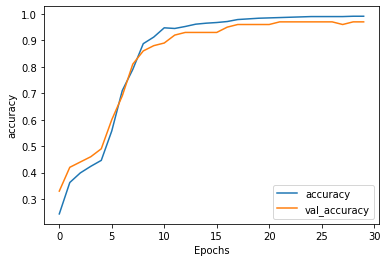

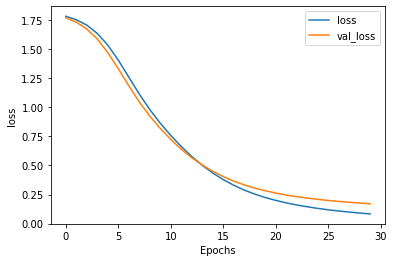

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


###Testing

In [ ]:
test_sequences = np.array(tokenizer.texts_to_sequences(X_test))
test_label_seq = np.array(label_tokenizer.texts_to_sequences(y_test))

loss, accuracy = model.evaluate(train_sequences, training_label_seq, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_sequences, test_label_seq , verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))




Training Accuracy: 0.9925
Testing Accuracy:  0.9400
